In [185]:
import pandas as pd
from plotnine import *
import matplotlib as plt
from statistics import mean

### Pour les gènes cibles (TAGISO) :

In [186]:
results_target = pd.read_csv("result_overlapping_peaks_tagiso_gap_0.csv")
results_target

/tmp/ipykernel_12451/2445156293.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Chromosome      Start        End Strand             Name  \
0               1  126372387  126372387      +          G3646.7   
1               1   50955772   50955772      +  TM_000000086537   
2               1  169185376  169185376      +         G4611.15   
3               1  136999790  136999790      +  TM_000000247154   
4               1   36085313   36085313      +          G934.11   
...           ...        ...        ...    ...              ...   
557569          Z         -1         -1      +               -1   
557570          Z         -1         -1      +               -1   
557571          Z         -1         -1      +               -1   
557572          Z         -1         -1      +               -1   
557573          Z         -1         -1      +               -1   

                    Gene  Type    Start_b      End_b           Name_b  Score  \
0       LOC_000000003916  mRNA  126371077  126372508   Interval_45949      0   
1       LOC_000000018019  mRNA   50955581   50960257   Interval_18578      0   
2       LOC_000000035042  mRNA  169184930  169186462   Interval_60422      0   
3       LOC_000000003520  mRNA  136997899  137001035   Interval_49824      0   
4       LOC_000000010920  mRNA   36085050   36086429   Interval_13253      0   
...                  ...   ...        ...        ...              ...    ...   
557569                -1    -1   82498856   82498945  Interval_374419      0   
557570                -1    -1   82512474   82512639  Interval_374420      0   
557571                -1    -1   82516013   82516365  Interval_374421      0   
557572                -1    -1   82523370   82527562  Interval_374422      0   
557573                -1    -1   82528610   82528693  Interval_374423      0   

       Strand_b  
0             +  
1             +  
2             +  
3             +  
4             +  
...         ...  
557569        +  
557570        +  
557571        +  
557572        +  
557573        +  

[557574 rows x 12 columns]

In [187]:
#Garder les lignes où il y a de gènes (lignes où la colonne 'Name' ne contient pas de '-1')
clean_results_target = results_target.loc[results_target['Name'] != "-1"]
clean_results_target

Chromosome      Start        End Strand             Name  \
0               1  126372387  126372387      +          G3646.7   
1               1   50955772   50955772      +  TM_000000086537   
2               1  169185376  169185376      +         G4611.15   
3               1  136999790  136999790      +  TM_000000247154   
4               1   36085313   36085313      +          G934.11   
...           ...        ...        ...    ...              ...   
538753          Z   44839017   44839017      +  TM_000002355994   
538754          Z   55968437   55968437      +  TM_000002368960   
538755          Z   43613272   43613272      +         G34898.2   
538756          Z   39189053   39189053      +         G34791.1   
538757          Z   29064881   29064881      +  TM_000002332907   

                    Gene    Type    Start_b      End_b          Name_b  Score  \
0       LOC_000000003916    mRNA  126371077  126372508  Interval_45949      0   
1       LOC_000000018019    mRNA   50955581   50960257  Interval_18578      0   
2       LOC_000000035042    mRNA  169184930  169186462  Interval_60422      0   
3       LOC_000000003520    mRNA  136997899  137001035  Interval_49824      0   
4       LOC_000000010920    mRNA   36085050   36086429  Interval_13253      0   
...                  ...     ...        ...        ...             ...    ...   
538753  LOC_000000011692    mRNA         -1         -1              -1     -1   
538754  LOC_000000052773  lncRNA         -1         -1              -1     -1   
538755  LOC_000000006068    mRNA         -1         -1              -1     -1   
538756  LOC_000000037496  lncRNA         -1         -1              -1     -1   
538757  LOC_000000104520  lncRNA         -1         -1              -1     -1   

       Strand_b  
0             +  
1             +  
2             +  
3             +  
4             +  
...         ...  
538753        +  
538754        +  
538755        +  
538756        +  
538757        +  

[221676 rows x 12 columns]

In [188]:
# Garder les gènes chevauchés par un pic ATAC-seq
filtered_df_overlap_target = clean_results_target[(clean_results_target['Start_b'] != -1)]
print(filtered_df_overlap_target)

       Chromosome      Start        End Strand             Name  \
0               1  126372387  126372387      +          G3646.7   
1               1   50955772   50955772      +  TM_000000086537   
2               1  169185376  169185376      +         G4611.15   
3               1  136999790  136999790      +  TM_000000247154   
4               1   36085313   36085313      +          G934.11   
...           ...        ...        ...    ...              ...   
536756          Z   13596605   13596605      +        G34173.22   
536757          Z   66596986   66596986      +         G35484.1   
536758          Z   63652427   63652427      +        G35378.32   
536759          Z   22461686   22461686      +        G34393.17   
536760          Z   40106808   40106808      +        G34803.72   

                    Gene  Type    Start_b      End_b           Name_b  Score  \
0       LOC_000000003916  mRNA  126371077  126372508   Interval_45949      0   
1       LOC_000000018019  mRNA   50

In [189]:
# Garder les gènes qui ne sont pas chevauchés par un pic ATAC-seq
filtered_df_no_overlap_target = clean_results_target[(clean_results_target['Start_b'] == -1)]
print(filtered_df_no_overlap_target)

       Chromosome      Start        End Strand             Name  \
26342           1  115645987  115645987      +  TM_000000214961   
26343           1   75286353   75286353      +  TM_000000139002   
26344           1  154536738  154536738      +          G4345.6   
26345           1   81825954   81825954      +  TM_000000162323   
26346           1   77468679   77468679      +  TM_000000145136   
...           ...        ...        ...    ...              ...   
538753          Z   44839017   44839017      +  TM_000002355994   
538754          Z   55968437   55968437      +  TM_000002368960   
538755          Z   43613272   43613272      +         G34898.2   
538756          Z   39189053   39189053      +         G34791.1   
538757          Z   29064881   29064881      +  TM_000002332907   

                    Gene    Type  Start_b  End_b Name_b  Score Strand_b  
26342   LOC_000000046247  lncRNA       -1     -1     -1     -1        +  
26343   LOC_000000010786    mRNA       -1     -

Pourcentage de transcrits longs dont le TSS est chevauché par un pic ATAC-seq :

In [190]:
# Nombre de transcrits au total
all_transcrits = len(clean_results_target.drop_duplicates(subset=['Name']))
# Nombre de transcrit chevauchés par un pic
overlapped_transcrits = len(filtered_df_overlap_target.drop_duplicates(subset=['Name']))
# Pourcentage de transcrits avec au moins un transcrit chevauché par un pic
percent_overlapped_transcrits = (overlapped_transcrits / all_transcrits) * 100

print("Pourcentage de gènes long dont le TSS est chevauché par un pic ATAC-seq :", percent_overlapped_transcrits)

Pourcentage de gènes long dont le TSS est chevauché par un pic ATAC-seq : 83.12988325303596


Pourcentage de chaque type de transcrits :

In [191]:
#Fonction pour calculer la proportion de chaque type de transcrits
def transcrits_type_repartition(dataframe):    
    transcrits_type = dataframe.drop_duplicates(subset=['Name','Type'])
    count_type = transcrits_type['Type'].value_counts()
    return count_type

In [192]:
# total
print(transcrits_type_repartition(clean_results_target))
# chevauchés
print(transcrits_type_repartition(filtered_df_overlap_target))
# non chevauchés
print(transcrits_type_repartition(filtered_df_no_overlap_target))

Type
mRNA      177457
lncRNA     42569
TUCp        1579
noORF         71
Name: count, dtype: int64
Type
mRNA      153436
lncRNA     30132
TUCp         698
noORF         13
Name: count, dtype: int64
Type
mRNA      24021
lncRNA    12437
TUCp        881
noORF        58
Name: count, dtype: int64


In [193]:
#Calculer le pourcentage de chaque biotype dans chaque condition par rapport au total
counts_total = transcrits_type_repartition(clean_results_target).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]
counts_overlap = transcrits_type_repartition(filtered_df_overlap_target).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]
counts_no_overlap = transcrits_type_repartition(filtered_df_no_overlap_target).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]

# Diviser chaque décompte de la deuxième série par le décompte correspondant de la première série
result_overlap = (counts_overlap / counts_total)*100
print(result_overlap)

result_no_overlap = (counts_no_overlap / counts_total)*100
print(result_no_overlap)

Type
lncRNA    70.783904
mRNA      86.463763
TUCp      44.205193
noORF     18.309859
Name: count, dtype: float64
Type
lncRNA    29.216096
mRNA      13.536237
TUCp      55.794807
noORF     81.690141
Name: count, dtype: float64


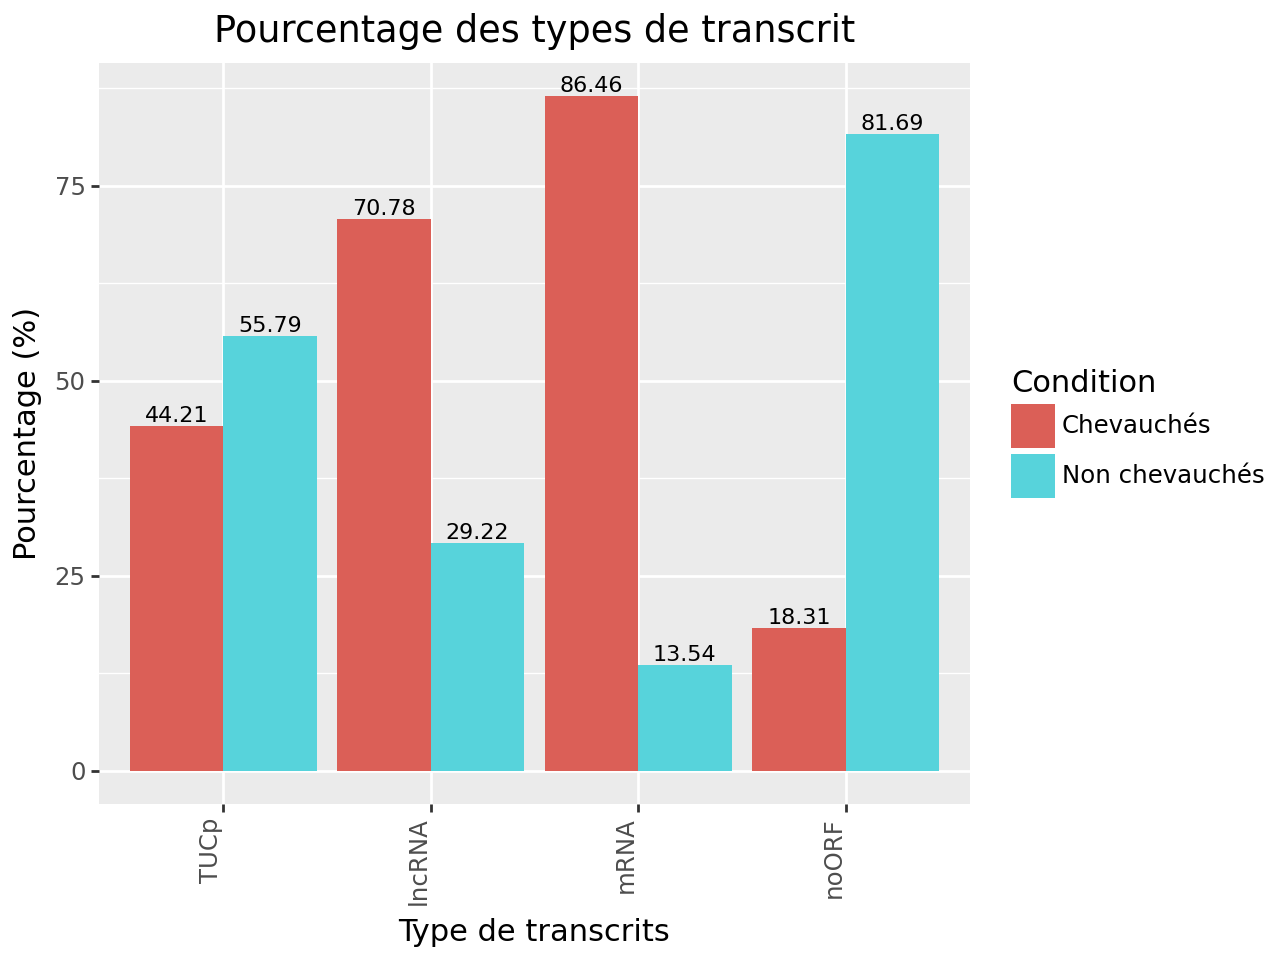

In [194]:
df_count_mirna_overlap = result_overlap.reset_index()
df_count_mirna_no_overlap = result_no_overlap.reset_index()

# Ajout d'une colonne 'Condition' pour chaque DataFrame
df_count_mirna_overlap['Condition'] = 'Chevauchés'
df_count_mirna_no_overlap['Condition'] = 'Non chevauchés'

combined_df = pd.concat([df_count_mirna_overlap,df_count_mirna_no_overlap])

combined_df.columns = ['Specie', 'Percentage', 'Condition']

# Création du graphique
dodge_width = 0.9
g = (ggplot(combined_df, aes(x='Specie', y='Percentage', fill='Condition'))
     + geom_bar(stat='identity', position=position_dodge(width=dodge_width))
     + geom_text(aes(label='round(Percentage, 2)'), position=position_dodge(width=dodge_width), size=8, va='bottom', ha='center')
     + ggtitle('Pourcentage des types de transcrit')
     + xlab('Type de transcrits')
     + ylab('Pourcentage (%)')
     + theme(axis_text_x=element_text(angle=90, hjust=1))  # Rotation des libellés de l'axe X
    )

# Affichage du graphique
g.show()


Pourcentage de gènes longs dont le TSS est chevauché par un pic ATAC-seq :

In [195]:
# Nombre de gènes au total
all_genes = len(clean_results_target.drop_duplicates(subset=['Gene']))
# Nombre de gènes chevauchés par un pic
overlapped_genes = len(filtered_df_overlap_target.drop_duplicates(subset=['Gene']))
# Pourcentage de gènes avec au moins un transcrit chevauché par un pic
percent_overlapped_genes = (overlapped_genes / all_genes) * 100

print("Pourcentage de gènes long dont le TSS est chevauché par un pic ATAC-seq :", percent_overlapped_genes)

Pourcentage de gènes long dont le TSS est chevauché par un pic ATAC-seq : 77.1631498290699


Pourcentage de chaque type de gènes :

In [196]:
#Fonction pour calculer la proportion de chaque type de gènes
def gene_type_repartition(dataframe):    
    genes_type = dataframe.drop_duplicates(subset=['Gene','Type'])
    count_type = genes_type['Type'].value_counts()
    return count_type

In [197]:
# total
print(gene_type_repartition(clean_results_target))
# chevauchés
print(gene_type_repartition(filtered_df_overlap_target))
# non chevauchés
print(gene_type_repartition(filtered_df_no_overlap_target))

Type
lncRNA    16948
mRNA      15495
TUCp       1423
noORF        66
Name: count, dtype: int64
Type
mRNA      13972
lncRNA    11563
TUCp        635
noORF        13
Name: count, dtype: int64
Type
mRNA      9558
lncRNA    7502
TUCp       802
noORF       54
Name: count, dtype: int64


Il y a des gènes dont les transcrits sont à la fois chevauché et non chevauché par un peak

In [198]:
#Récupération des gènes qui possèdent à la fois des transcrits chevauchés et non chevauchés
df_common = pd.merge(filtered_df_overlap_target[['Gene','Type']], filtered_df_no_overlap_target[['Gene','Type']], on=['Gene'],how='inner')
df_common = df_common.rename(columns={'Type_x': 'Type'})
df_common

Gene  Type Type_y
0       LOC_000000003916  mRNA   mRNA
1       LOC_000000003916  mRNA   mRNA
2       LOC_000000003916  mRNA   mRNA
3       LOC_000000003916  mRNA   mRNA
4       LOC_000000018019  mRNA   mRNA
...                  ...   ...    ...
352291  LOC_000000000289  mRNA   mRNA
352292  LOC_000000000289  mRNA   mRNA
352293  LOC_000000000289  mRNA   mRNA
352294  LOC_000000000289  mRNA   mRNA
352295  LOC_000000000289  mRNA   mRNA

[352296 rows x 3 columns]

In [199]:
all_genes = len(df_common.drop_duplicates(subset=['Gene']))
print(all_genes) #10167 gènes

10167


In [200]:
#Récupération des gènes qui sont soit uniquement chevauchés soit uniquement non chevauchés
df_diff = pd.merge(filtered_df_overlap_target[['Gene','Type']], filtered_df_no_overlap_target[['Gene','Type']], on=['Gene'],how='outer')
print(df_diff)

                    Gene  Type_x  Type_y
0       LOC_000000000000  lncRNA  lncRNA
1       LOC_000000000000  lncRNA  lncRNA
2       LOC_000000000000  lncRNA  lncRNA
3       LOC_000000000000  lncRNA  lncRNA
4       LOC_000000000000  lncRNA  lncRNA
...                  ...     ...     ...
431893  LOC_000000221606    mRNA     NaN
431894  LOC_000000221638  lncRNA     NaN
431895  LOC_000000221639    mRNA     NaN
431896  LOC_000000221641     NaN  lncRNA
431897  LOC_000000221661  lncRNA     NaN

[431898 rows x 3 columns]


In [201]:
all_genes = len(df_diff.drop_duplicates(subset=['Gene']))
print(all_genes) #33932 gènes

33932


In [202]:
df_genes_only_overlap = df_diff[df_diff['Type_y'].isna()]
df_genes_only_overlap = df_genes_only_overlap.rename(columns={'Type_x': 'Type'})
all_genes_overlap = len(df_genes_only_overlap.drop_duplicates(subset=['Gene']))
print(all_genes_overlap) #16016 gènes

16016


In [203]:
df_genes_only_no_overlap = df_diff[df_diff['Type_x'].isna()]
df_genes_only_no_overlap = df_genes_only_no_overlap.rename(columns={'Type_y': 'Type'})
all_genes_no_overlap = len(df_genes_only_no_overlap.drop_duplicates(subset=['Gene']))
print(all_genes_no_overlap) #7749 gènes

7749


In [204]:
df_diff['Type'] = df_diff['Type_x']
df_diff['Type'] = df_diff['Type_x'].fillna(df_diff['Type_y'])
print(df_diff)

                    Gene  Type_x  Type_y    Type
0       LOC_000000000000  lncRNA  lncRNA  lncRNA
1       LOC_000000000000  lncRNA  lncRNA  lncRNA
2       LOC_000000000000  lncRNA  lncRNA  lncRNA
3       LOC_000000000000  lncRNA  lncRNA  lncRNA
4       LOC_000000000000  lncRNA  lncRNA  lncRNA
...                  ...     ...     ...     ...
431893  LOC_000000221606    mRNA     NaN    mRNA
431894  LOC_000000221638  lncRNA     NaN  lncRNA
431895  LOC_000000221639    mRNA     NaN    mRNA
431896  LOC_000000221641     NaN  lncRNA  lncRNA
431897  LOC_000000221661  lncRNA     NaN  lncRNA

[431898 rows x 4 columns]


In [205]:
#Calculer le pourcentage de chaque espèce dans chaque condition par rapport au total
counts_total = gene_type_repartition(df_diff.drop_duplicates(subset=['Gene'])).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]
counts_overlap = gene_type_repartition(df_genes_only_overlap.drop_duplicates(subset=['Gene'])).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]
counts_no_overlap = gene_type_repartition(df_genes_only_no_overlap.drop_duplicates(subset=['Gene'])).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]
counts_both = gene_type_repartition(df_common.drop_duplicates(subset=['Gene'])).loc[['lncRNA', 'mRNA', 'TUCp', 'noORF']]

# Diviser chaque décompte de la deuxième série par le décompte correspondant de la première série
result_overlap = (counts_overlap / counts_total)*100
print(result_overlap)

result_no_overlap = (counts_no_overlap / counts_total)*100
print(result_no_overlap)

result_both = (counts_both/ counts_total)*100
print(result_both)

Type
lncRNA    55.735190
mRNA      38.315586
TUCp      43.640197
noORF     18.181818
Name: count, dtype: float64
Type
lncRNA    31.773661
mRNA       9.828977
TUCp      55.375966
noORF     80.303030
Name: count, dtype: float64
Type
lncRNA    12.491149
mRNA      51.855437
TUCp       0.983837
noORF      1.515152
Name: count, dtype: float64


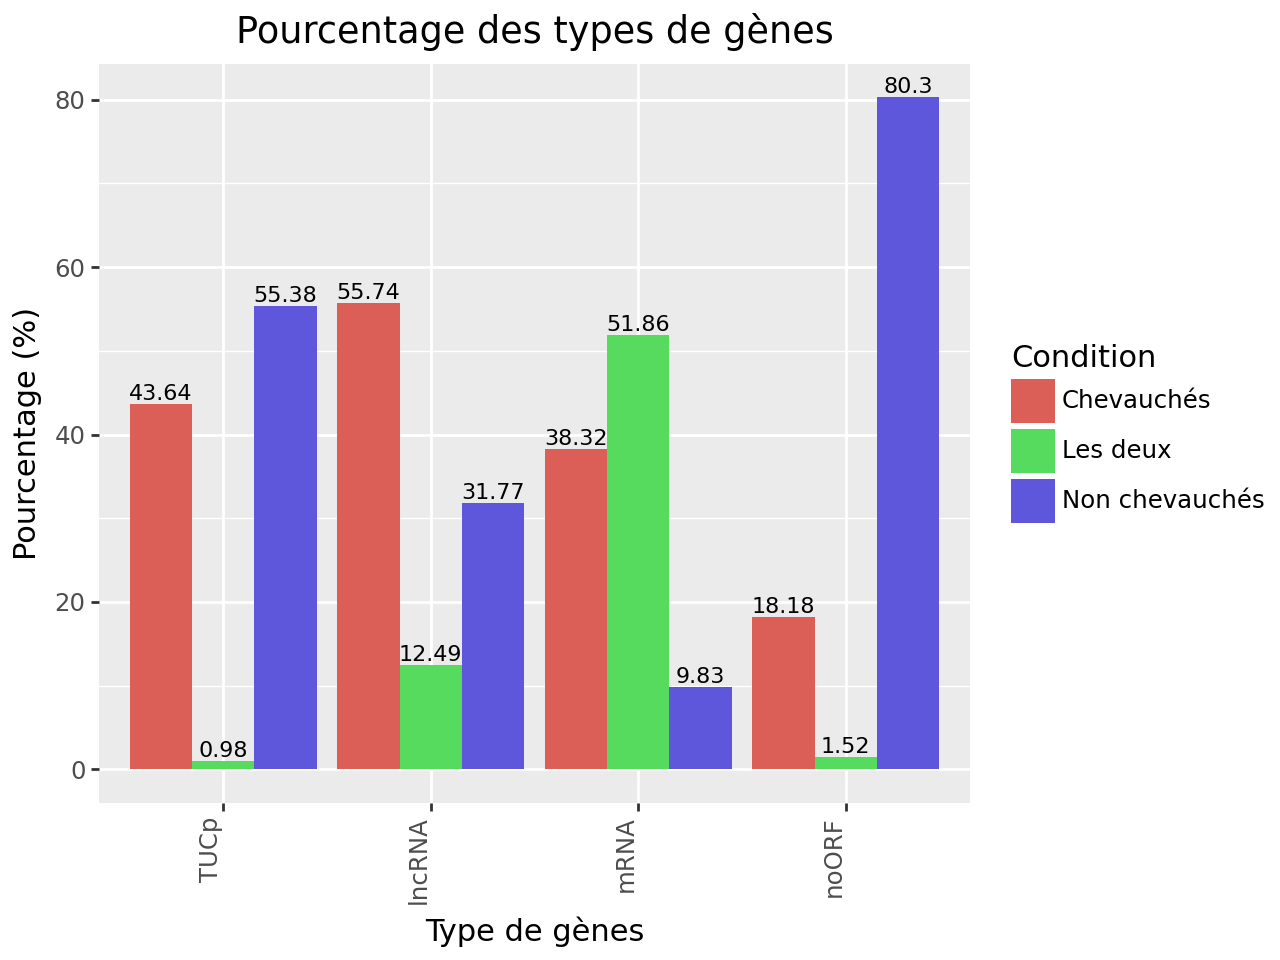

In [206]:
df_count_genes_overlap = result_overlap.reset_index()
df_count_genes_no_overlap = result_no_overlap.reset_index()
df_count_genes_both = result_both.reset_index()

# Ajout d'une colonne 'Condition' pour chaque DataFrame
df_count_genes_overlap['Condition'] = 'Chevauchés'
df_count_genes_no_overlap['Condition'] = 'Non chevauchés'
df_count_genes_both['Condition'] = 'Les deux'

combined_df = pd.concat([df_count_genes_overlap,df_count_genes_no_overlap,df_count_genes_both])

combined_df.columns = ['Type', 'Percentage', 'Condition']

# Création du graphique
dodge_width = 0.9
g = (ggplot(combined_df, aes(x='Type', y='Percentage', fill='Condition'))
     + geom_bar(stat='identity', position=position_dodge(width=dodge_width))
     + geom_text(aes(label='round(Percentage, 2)'), position=position_dodge(width=dodge_width), size=8, va='bottom', ha='center')
     + ggtitle('Pourcentage des types de gènes')
     + xlab('Type de gènes')
     + ylab('Pourcentage (%)')
     + theme(axis_text_x=element_text(angle=90, hjust=1))  # Rotation des libellés de l'axe X
    )

# Affichage du graphique
g.show()



### Pour les gènes Ensembl

In [207]:
results_ensembl = pd.read_csv("result_overlapping_peaks_ensembl_gap_0.csv")

/tmp/ipykernel_12451/2012010642.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [208]:
#Garder les lignes où il y a de gènes (lignes où la colonne 'Name' ne contient pas de '-1')
clean_results_ensembl = results_ensembl.loc[results_ensembl['Name'] != "-1"]

In [209]:
# Garder les gènes chevauchés par un pic ATAC-seq
filtered_df_overlap_ensembl = clean_results_ensembl[(clean_results_ensembl['Start_b'] != -1)]

In [210]:
# Garder les gènes qui ne sont pas chevauchés par un pic ATAC-seq
filtered_df_no_overlap_ensembl = clean_results_ensembl[(clean_results_ensembl['Start_b'] == -1)]

In [211]:
# Nombre de transcrits au total
all_transcrits = len(clean_results_ensembl.drop_duplicates(subset=['Name']))
print(all_transcrits)
# Nombre de transcrit chevauchés par un pic
overlapped_transcrits = len(filtered_df_overlap_ensembl.drop_duplicates(subset=['Name']))
# Pourcentage de transcrits avec au moins un transcrit chevauché par un pic
percent_overlapped_transcrits = (overlapped_transcrits / all_transcrits) * 100

print("Pourcentage de gènes long dont le TSS est chevauché par un pic ATAC-seq :", percent_overlapped_transcrits)

74296
Pourcentage de gènes long dont le TSS est chevauché par un pic ATAC-seq : 69.80860342414127


In [212]:
# total
print(transcrits_type_repartition(clean_results_ensembl))
# chevauchés
print(transcrits_type_repartition(filtered_df_overlap_ensembl))
# non chevauchés
print(transcrits_type_repartition(filtered_df_no_overlap_ensembl))

Type
protein_coding          44826
lncRNA                  28132
miRNA                     850
snoRNA                    200
rRNA                      108
snRNA                      74
pseudogene                 43
Mt_tRNA                    22
scaRNA                     15
processed_pseudogene       13
misc_RNA                    5
Y_RNA                       2
ribozyme                    2
vault_RNA                   2
Mt_rRNA                     2
Name: count, dtype: int64
Type
protein_coding          36392
lncRNA                  14835
miRNA                     480
snoRNA                     68
snRNA                      39
pseudogene                 21
scaRNA                      8
rRNA                        7
misc_RNA                    5
processed_pseudogene        5
Y_RNA                       2
ribozyme                    2
vault_RNA                   1
Name: count, dtype: int64
Type
lncRNA                  13297
protein_coding           8434
miRNA                     370
sno

Pourcentage de chaque type de transcrit

In [213]:
#Calculer le pourcentage de chaque biotype dans chaque condition par rapport au total
counts_total = transcrits_type_repartition(clean_results_ensembl).loc[transcrits_type_repartition(clean_results_ensembl).index.tolist()]
counts_overlap = transcrits_type_repartition(filtered_df_overlap_ensembl).loc[transcrits_type_repartition(filtered_df_overlap_ensembl).index.tolist()]
counts_no_overlap = transcrits_type_repartition(filtered_df_no_overlap_ensembl).loc[transcrits_type_repartition(filtered_df_no_overlap_ensembl).index.tolist()]

# Diviser chaque décompte de la deuxième série par le décompte correspondant de la première série
result_overlap = (counts_overlap / counts_total)*100
print(result_overlap)

result_no_overlap = (counts_no_overlap / counts_total)*100
print(result_no_overlap)

Type
Mt_rRNA                        NaN
Mt_tRNA                        NaN
Y_RNA                   100.000000
lncRNA                   52.733542
miRNA                    56.470588
misc_RNA                100.000000
processed_pseudogene     38.461538
protein_coding           81.185027
pseudogene               48.837209
rRNA                      6.481481
ribozyme                100.000000
scaRNA                   53.333333
snRNA                    52.702703
snoRNA                   34.000000
vault_RNA                50.000000
Name: count, dtype: float64
Type
Mt_rRNA                 100.000000
Mt_tRNA                 100.000000
Y_RNA                          NaN
lncRNA                   47.266458
miRNA                    43.529412
misc_RNA                       NaN
processed_pseudogene     61.538462
protein_coding           18.814973
pseudogene               51.162791
rRNA                     93.518519
ribozyme                       NaN
scaRNA                   46.666667
snRNA            

/home/ocarpentier/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 5 rows containing missing values.
/home/ocarpentier/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 5 rows containing missing values.


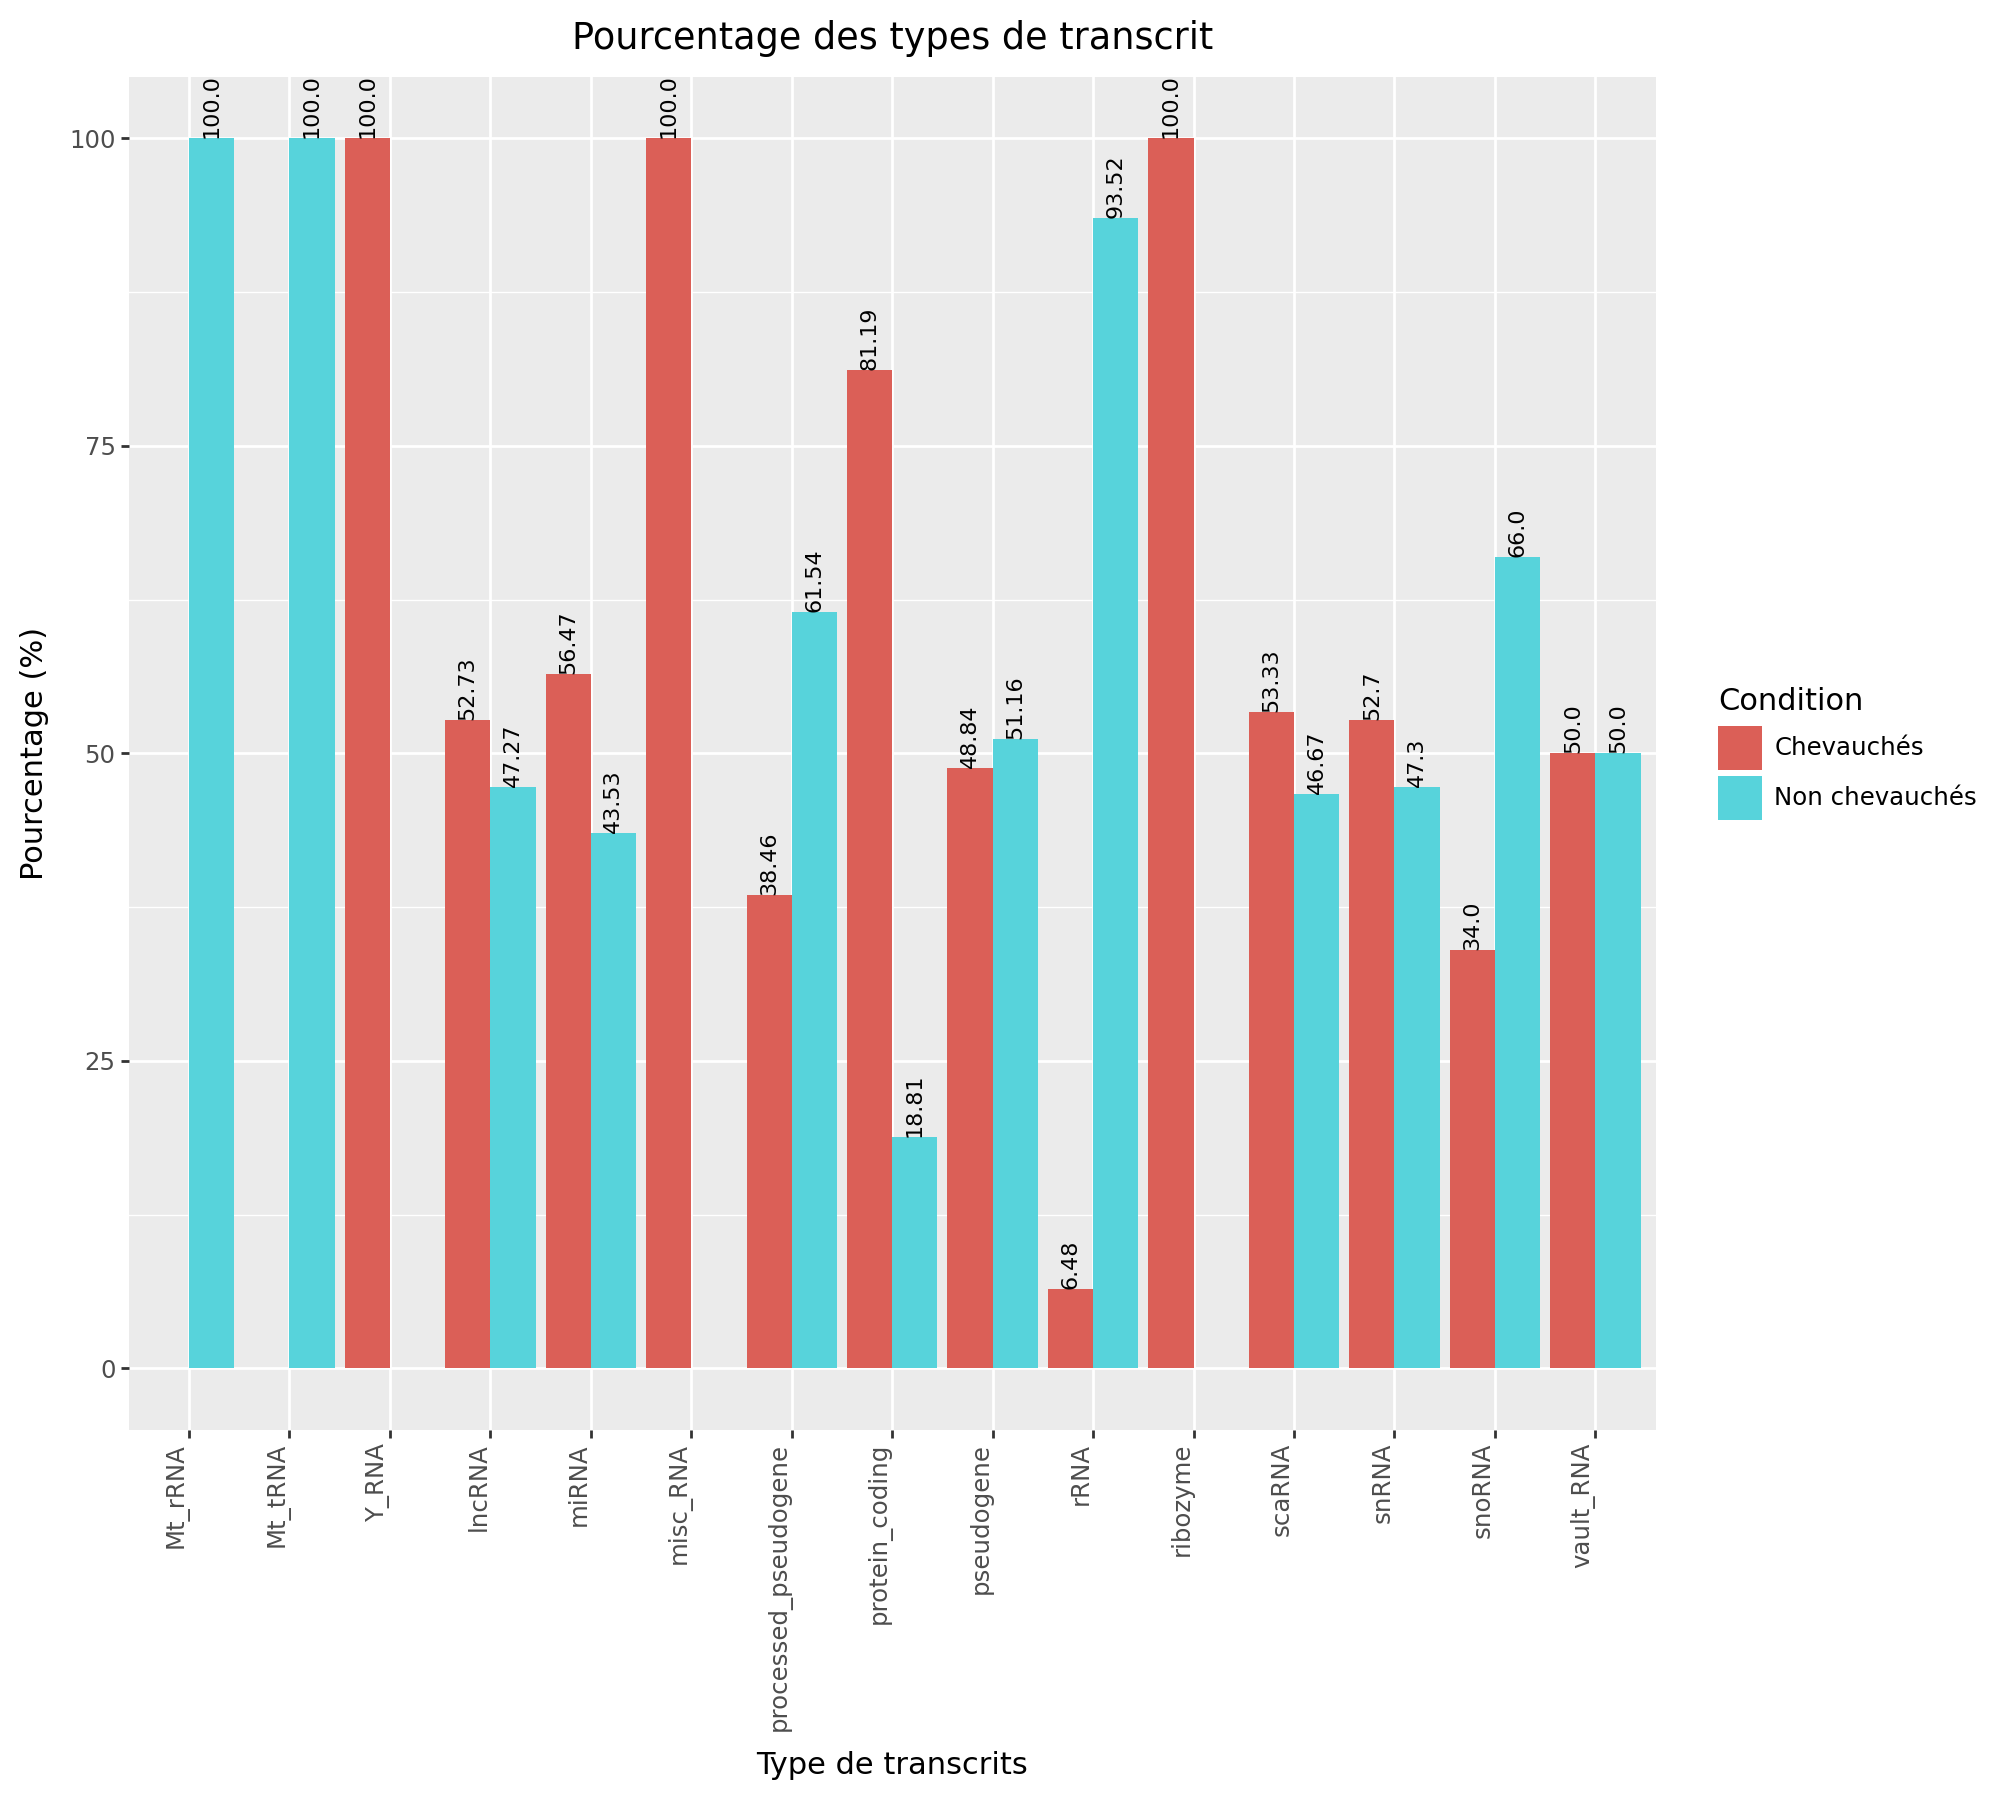

In [214]:
df_count_ensembl_overlap = result_overlap.reset_index()
df_count_ensembl_no_overlap = result_no_overlap.reset_index()

# Ajout d'une colonne 'Condition' pour chaque DataFrame
df_count_ensembl_overlap['Condition'] = 'Chevauchés'
df_count_ensembl_no_overlap['Condition'] = 'Non chevauchés'

combined_df = pd.concat([df_count_ensembl_overlap,df_count_ensembl_no_overlap])

combined_df.columns = ['Type', 'Percentage', 'Condition']

# Création du graphique
dodge_width = 0.9
g = (ggplot(combined_df, aes(x='Type', y='Percentage', fill='Condition'))
     + geom_bar(stat='identity', position=position_dodge(width=dodge_width))
     + geom_text(aes(label='round(Percentage, 2)'), position=position_dodge(width=dodge_width), size=8, va='bottom', ha='center',angle=90)
     + ggtitle('Pourcentage des types de transcrit')
     + xlab('Type de transcrits')
     + ylab('Pourcentage (%)')
     + theme(axis_text_x=element_text(angle=90, hjust=1),figure_size=(10,9))
     
    )

# Affiche le graphique
g.show()

In [171]:
# Nombre de gènes au total
all_genes = len(clean_results_ensembl.drop_duplicates(subset=['Gene']))
print(all_genes)
# Nombre de gènes chevauchés par un pic
overlapped_genes = len(filtered_df_overlap_ensembl.drop_duplicates(subset=['Gene']))
# Pourcentage de gènes avec au moins un transcrit chevauché par un pic
percent_overlapped_genes = (overlapped_genes / all_genes) * 100

print("Pourcentage de gènes ensembl dont le TSS est chevauché par un pic ATAC-seq :", percent_overlapped_genes)

30862
Pourcentage de gènes ensembl dont le TSS est chevauché par un pic ATAC-seq : 72.76586092929817


In [172]:
# total
print(gene_type_repartition(clean_results_ensembl))
# chevauchés
print(gene_type_repartition(filtered_df_overlap_ensembl))
# non chevauchés
print(gene_type_repartition(filtered_df_no_overlap_ensembl))

Type
protein_coding          17077
lncRNA                  12447
miRNA                     850
snoRNA                    200
rRNA                      108
snRNA                      74
pseudogene                 43
Mt_tRNA                    22
scaRNA                     15
processed_pseudogene       13
misc_RNA                    5
Y_RNA                       2
ribozyme                    2
vault_RNA                   2
Mt_rRNA                     2
Name: count, dtype: int64
Type
protein_coding          14462
lncRNA                   7357
miRNA                     480
snoRNA                     68
snRNA                      39
pseudogene                 21
scaRNA                      8
rRNA                        7
misc_RNA                    5
processed_pseudogene        5
Y_RNA                       2
ribozyme                    2
vault_RNA                   1
Name: count, dtype: int64
Type
lncRNA                  7582
protein_coding          5625
miRNA                    370
snoRNA

In [173]:
#Récupération des gènes qui possèdent à la fois des transcrits chevauchés et non chevauchés
df_common = pd.merge(filtered_df_overlap_ensembl[['Gene','Type']], filtered_df_no_overlap_ensembl[['Gene','Type']], on=['Gene'],how='inner')
df_common = df_common.rename(columns={'Type_x': 'Type'})
df_common

Gene            Type          Type_y
0      ENSGALG00000016906  protein_coding  protein_coding
1      ENSGALG00000016906  protein_coding  protein_coding
2      ENSGALG00000016906  protein_coding  protein_coding
3      ENSGALG00000016906  protein_coding  protein_coding
4      ENSGALG00000016906  protein_coding  protein_coding
...                   ...             ...             ...
23754  ENSGALG00000056790          lncRNA          lncRNA
23755  ENSGALG00000031794  protein_coding  protein_coding
23756  ENSGALG00000031794  protein_coding  protein_coding
23757  ENSGALG00000031794  protein_coding  protein_coding
23758  ENSGALG00000031794  protein_coding  protein_coding

[23759 rows x 3 columns]

In [174]:
#Récupération des gènes qui sont soit uniquement chevauchés soit uniquement non chevauchés
df_diff = pd.merge(filtered_df_overlap_ensembl[['Gene','Type']], filtered_df_no_overlap_ensembl[['Gene','Type']], on=['Gene'],how='outer')
print(df_diff)

                     Gene          Type_x          Type_y
0      ENSGALG00000000003  protein_coding             NaN
1      ENSGALG00000000011  protein_coding             NaN
2      ENSGALG00000000038             NaN  protein_coding
3      ENSGALG00000000044  protein_coding             NaN
4      ENSGALG00000000044  protein_coding             NaN
...                   ...             ...             ...
74015  ENSGALG00000068583             NaN          lncRNA
74016  ENSGALG00000068583             NaN          lncRNA
74017  ENSGALG00000068583             NaN          lncRNA
74018  ENSGALG00000068584          lncRNA          lncRNA
74019  ENSGALG00000068584          lncRNA          lncRNA

[74020 rows x 3 columns]


In [175]:
df_genes_only_overlap = df_diff[df_diff['Type_y'].isna()]
df_genes_only_overlap = df_genes_only_overlap.rename(columns={'Type_x': 'Type'})
all_genes_overlap = len(df_genes_only_overlap.drop_duplicates(subset=['Gene']))
print(all_genes_overlap) #16955 gènes

16955


In [176]:
df_genes_only_no_overlap = df_diff[df_diff['Type_x'].isna()]
df_genes_only_no_overlap = df_genes_only_no_overlap.rename(columns={'Type_y': 'Type'})
all_genes_no_overlap = len(df_genes_only_no_overlap.drop_duplicates(subset=['Gene']))
print(all_genes_no_overlap) #8405 gènes

8405


In [177]:
df_diff['Type'] = df_diff['Type_x']
df_diff['Type'] = df_diff['Type_x'].fillna(df_diff['Type_y'])
print(df_diff)

                     Gene          Type_x          Type_y            Type
0      ENSGALG00000000003  protein_coding             NaN  protein_coding
1      ENSGALG00000000011  protein_coding             NaN  protein_coding
2      ENSGALG00000000038             NaN  protein_coding  protein_coding
3      ENSGALG00000000044  protein_coding             NaN  protein_coding
4      ENSGALG00000000044  protein_coding             NaN  protein_coding
...                   ...             ...             ...             ...
74015  ENSGALG00000068583             NaN          lncRNA          lncRNA
74016  ENSGALG00000068583             NaN          lncRNA          lncRNA
74017  ENSGALG00000068583             NaN          lncRNA          lncRNA
74018  ENSGALG00000068584          lncRNA          lncRNA          lncRNA
74019  ENSGALG00000068584          lncRNA          lncRNA          lncRNA

[74020 rows x 4 columns]


In [178]:
#Calculer le pourcentage de chaque espèce dans chaque condition par rapport au total
counts_total = gene_type_repartition(df_diff.drop_duplicates(subset=['Gene'])).loc[gene_type_repartition(df_diff).index.tolist()]
counts_overlap = gene_type_repartition(df_genes_only_overlap.drop_duplicates(subset=['Gene'])).loc[gene_type_repartition(df_genes_only_overlap).index.tolist()]
counts_no_overlap = gene_type_repartition(df_genes_only_no_overlap.drop_duplicates(subset=['Gene'])).loc[gene_type_repartition(df_genes_only_no_overlap).index.tolist()]
counts_both = gene_type_repartition(df_common.drop_duplicates(subset=['Gene'])).loc[gene_type_repartition(df_common).index.tolist()]

# Diviser chaque décompte de la deuxième série par le décompte correspondant de la première série
result_overlap = (counts_overlap / counts_total)*100
print(result_overlap)

result_no_overlap = (counts_no_overlap / counts_total)*100
print(result_no_overlap)

result_both = (counts_both/ counts_total)*100
print(result_both)

Type
Mt_rRNA                        NaN
Mt_tRNA                        NaN
Y_RNA                   100.000000
lncRNA                   39.085723
miRNA                    56.470588
misc_RNA                100.000000
processed_pseudogene     38.461538
protein_coding           67.060959
pseudogene               48.837209
rRNA                      6.481481
ribozyme                100.000000
scaRNA                   53.333333
snRNA                    52.702703
snoRNA                   34.000000
vault_RNA                50.000000
Name: count, dtype: float64
Type
Mt_rRNA                 100.000000
Mt_tRNA                 100.000000
Y_RNA                          NaN
lncRNA                   40.893388
miRNA                    43.529412
misc_RNA                       NaN
processed_pseudogene     61.538462
protein_coding           15.312994
pseudogene               51.162791
rRNA                     93.518519
ribozyme                       NaN
scaRNA                   46.666667
snRNA            

/home/ocarpentier/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 18 rows containing missing values.
/home/ocarpentier/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 18 rows containing missing values.


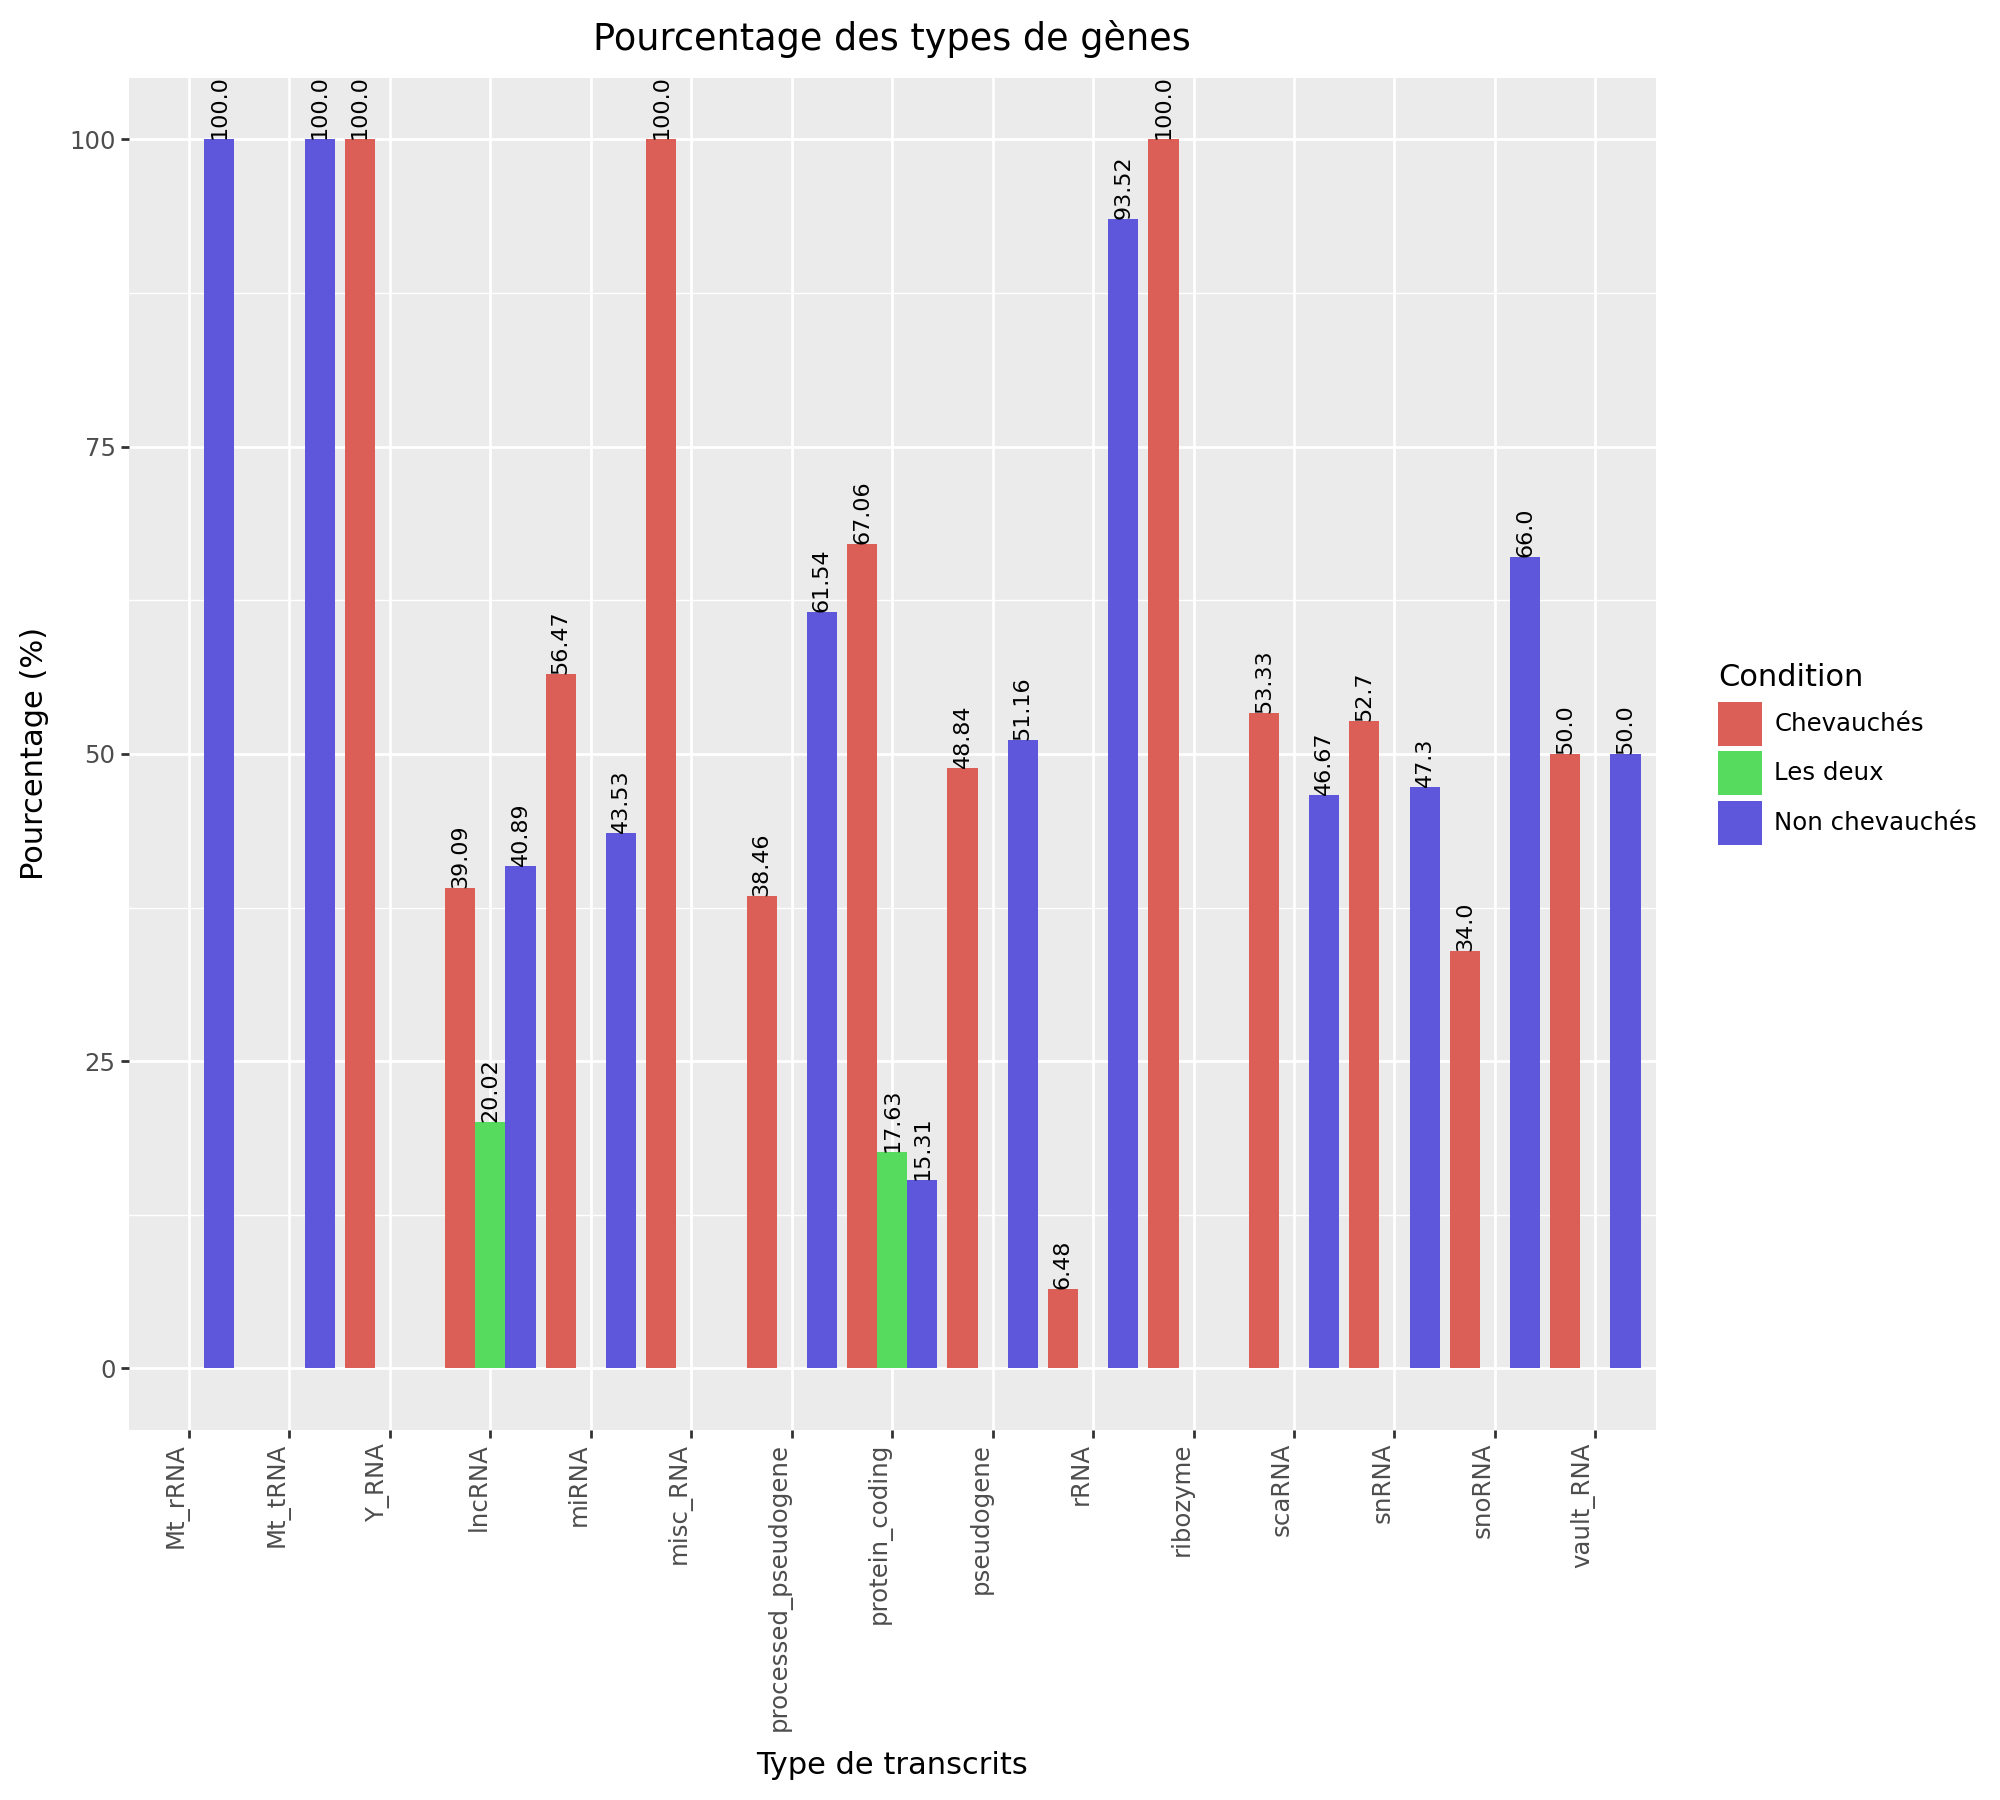

In [184]:
df_count_ensembl_overlap = result_overlap.reset_index()
df_count_ensembl_no_overlap = result_no_overlap.reset_index()
df_count_ensembl_both = result_both.reset_index()

# Ajout d'une colonne 'Condition' pour chaque DataFrame
df_count_ensembl_overlap['Condition'] = 'Chevauchés'
df_count_ensembl_no_overlap['Condition'] = 'Non chevauchés'
df_count_ensembl_both['Condition'] = 'Les deux'

combined_df = pd.concat([df_count_ensembl_overlap,df_count_ensembl_no_overlap, df_count_ensembl_both])

combined_df.columns = ['Type', 'Percentage', 'Condition']

# Création du graphique
dodge_width = 0.9
g = (ggplot(combined_df, aes(x='Type', y='Percentage', fill='Condition'))
     + geom_bar(stat='identity', position=position_dodge(width=dodge_width))
     + geom_text(aes(label='round(Percentage, 2)'), position=position_dodge(width=dodge_width), size=8, va='bottom', ha='center',angle=90)
     + ggtitle('Pourcentage des types de gènes')
     + xlab('Type de transcrits')
     + ylab('Pourcentage (%)')
     + theme(axis_text_x=element_text(angle=90, hjust=1),figure_size=(10,9))
    )

# Affichage du graphique
g.show()

### Pour les miARN (mirdeep2) :

In [115]:
results_mirna = pd.read_csv("result_overlapping_peaks_mirdeep_gap_0.csv")
results_mirna

/tmp/ipykernel_12451/3541600335.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Chromosome    Start      End Strand         Name         Specie  \
0               1   421771   421771      +  mirdeep2.12  Gallus_gallus   
1               1   572220   572220      +  mirdeep2.15  Gallus_gallus   
2               1   596831   596831      +  mirdeep2.16  Gallus_gallus   
3               1  1128302  1128302      +  mirdeep2.23          novel   
4               1  1178477  1178477      +  mirdeep2.25  Gallus_gallus   
...           ...      ...      ...    ...          ...            ...   
374458          Z       -1       -1      +           -1             -1   
374459          Z       -1       -1      +           -1             -1   
374460          Z       -1       -1      +           -1             -1   
374461          Z       -1       -1      +           -1             -1   
374462          Z       -1       -1      +           -1             -1   

         Start_b     End_b           Name_b  Score Strand_b  
0         420951    422046     Interval_130      0        +  
1         571344    573006     Interval_207      0        +  
2         596714    597066     Interval_219      0        +  
3        1127050   1130184     Interval_414      0        +  
4        1176768   1179024     Interval_437      0        +  
...          ...       ...              ...    ...      ...  
374458  82498856  82498945  Interval_374419      0        +  
374459  82512474  82512639  Interval_374420      0        +  
374460  82516013  82516365  Interval_374421      0        +  
374461  82523370  82527562  Interval_374422      0        +  
374462  82528610  82528693  Interval_374423      0        +  

[374463 rows x 11 columns]

In [116]:
#Garder les lignes où il y a de gènes (lignes où la colonne 'Name' ne contient pas de '-1')
clean_results_mirna = results_mirna.loc[results_mirna['Name'] != "-1"]
clean_results_mirna

Chromosome     Start       End Strand           Name         Specie  \
0               1    421771    421771      +    mirdeep2.12  Gallus_gallus   
1               1    572220    572220      +    mirdeep2.15  Gallus_gallus   
2               1    596831    596831      +    mirdeep2.16  Gallus_gallus   
3               1   1128302   1128302      +    mirdeep2.23          novel   
4               1   1178477   1178477      +    mirdeep2.25  Gallus_gallus   
...           ...       ...       ...    ...            ...            ...   
353937          Z  60673643  60673643      +  mirdeep2.6361          other   
353938          Z  66646492  66646492      +  mirdeep2.6380  Gallus_gallus   
353939          Z  78732076  78732076      +  mirdeep2.6420          other   
353940          Z  78737707  78737707      +  mirdeep2.6421          novel   
353941          Z  81826520  81826520      +  mirdeep2.6435          novel   

        Start_b    End_b        Name_b  Score Strand_b  
0        420951   422046  Interval_130      0        +  
1        571344   573006  Interval_207      0        +  
2        596714   597066  Interval_219      0        +  
3       1127050  1130184  Interval_414      0        +  
4       1176768  1179024  Interval_437      0        +  
...         ...      ...           ...    ...      ...  
353937       -1       -1            -1     -1        +  
353938       -1       -1            -1     -1        +  
353939       -1       -1            -1     -1        +  
353940       -1       -1            -1     -1        +  
353941       -1       -1            -1     -1        +  

[2249 rows x 11 columns]

In [117]:
# Garder les gènes chevauchés par un pic ATAC-seq
filtered_df_overlap_mirna = clean_results_mirna[(clean_results_mirna['Start_b'] != -1)]
print(filtered_df_overlap_mirna)

       Chromosome     Start       End Strand           Name         Specie  \
0               1    421771    421771      +    mirdeep2.12  Gallus_gallus   
1               1    572220    572220      +    mirdeep2.15  Gallus_gallus   
2               1    596831    596831      +    mirdeep2.16  Gallus_gallus   
3               1   1128302   1128302      +    mirdeep2.23          novel   
4               1   1178477   1178477      +    mirdeep2.25  Gallus_gallus   
...           ...       ...       ...    ...            ...            ...   
353910          Z  72766240  72766240      +  mirdeep2.6409          novel   
353911          Z  72766187  72766187      +  mirdeep2.6410          novel   
353912          Z  81800786  81800786      +  mirdeep2.6434          novel   
353913          Z  81830614  81830614      +  mirdeep2.6436          novel   
353914          Z  82313216  82313216      +  mirdeep2.6437          novel   

         Start_b     End_b           Name_b  Score Strand_b  
0

In [118]:
# Garder les gènes chevauchés par un pic ATAC-seq
filtered_df_no_overlap_mirna = clean_results_mirna[(clean_results_mirna['Start_b'] == -1)]
print(filtered_df_no_overlap_mirna)

       Chromosome     Start       End Strand           Name         Specie  \
163             1    219508    219508      +     mirdeep2.7          novel   
164             1   1077798   1077798      +    mirdeep2.21          novel   
165             1   1478777   1478777      +    mirdeep2.36          other   
166             1   1479800   1479800      +    mirdeep2.37          other   
167             1   1479916   1479916      +    mirdeep2.38          other   
...           ...       ...       ...    ...            ...            ...   
353937          Z  60673643  60673643      +  mirdeep2.6361          other   
353938          Z  66646492  66646492      +  mirdeep2.6380  Gallus_gallus   
353939          Z  78732076  78732076      +  mirdeep2.6420          other   
353940          Z  78737707  78737707      +  mirdeep2.6421          novel   
353941          Z  81826520  81826520      +  mirdeep2.6435          novel   

        Start_b  End_b Name_b  Score Strand_b  
163          -1

Pourcentage de gènes courts dont le TSS est chevauché par un pic ATAC-seq :

In [119]:
# Nombre de miARN au total
all_mirna = len(clean_results_mirna)
# Nombre de miARN dont le TSS est chevauché par un pic
overlapped_mirna = len(filtered_df_overlap_mirna.drop_duplicates(subset=['Name']))
# Pourcentage de miARN dont le TSS est chevauché par un pic
percent_overlapped_mirna = (overlapped_mirna / all_mirna) * 100

print("Pourcentage de gènes courts dont le TSS est chevauché par un pic ATAC-seq :", percent_overlapped_mirna)

Pourcentage de gènes courts dont le TSS est chevauché par un pic ATAC-seq : 73.41040462427746


Pourcentage de chaque espèce :

In [120]:
#Fonction pour calculer la proportion de chaque espèce
def species_repartition(dataframe):
    mirna_species = dataframe.drop_duplicates(subset=['Name','Specie'])    
    count_species = mirna_species['Specie'].value_counts()
    return(count_species)

In [121]:
# total
print(species_repartition(clean_results_mirna))
# chevauchés
print(species_repartition(filtered_df_overlap_mirna))
# non chevauchés
print(species_repartition(filtered_df_no_overlap_mirna))

Specie
novel            1708
Gallus_gallus     372
other             169
Name: count, dtype: int64
Specie
novel            1308
Gallus_gallus     255
other              88
Name: count, dtype: int64
Specie
novel            400
Gallus_gallus    117
other             81
Name: count, dtype: int64


In [122]:
#Calculer le pourcentage de chaque espèce dans chaque condition par rapport au total
counts_total = species_repartition(clean_results_mirna).loc[['novel', 'Gallus_gallus', 'other']]
counts_overlap = species_repartition(filtered_df_overlap_mirna).loc[['novel', 'Gallus_gallus', 'other']]
counts_no_overlap = species_repartition(filtered_df_no_overlap_mirna).loc[['novel', 'Gallus_gallus', 'other']]

# Diviser chaque décompte de la deuxième série par le décompte correspondant de la première série
result_overlap = (counts_overlap / counts_total)*100
print(result_overlap)

Specie
novel            76.580796
Gallus_gallus    68.548387
other            52.071006
Name: count, dtype: float64


In [123]:
result_no_overlap = (counts_no_overlap / counts_total)*100
print(result_no_overlap)

Specie
novel            23.419204
Gallus_gallus    31.451613
other            47.928994
Name: count, dtype: float64


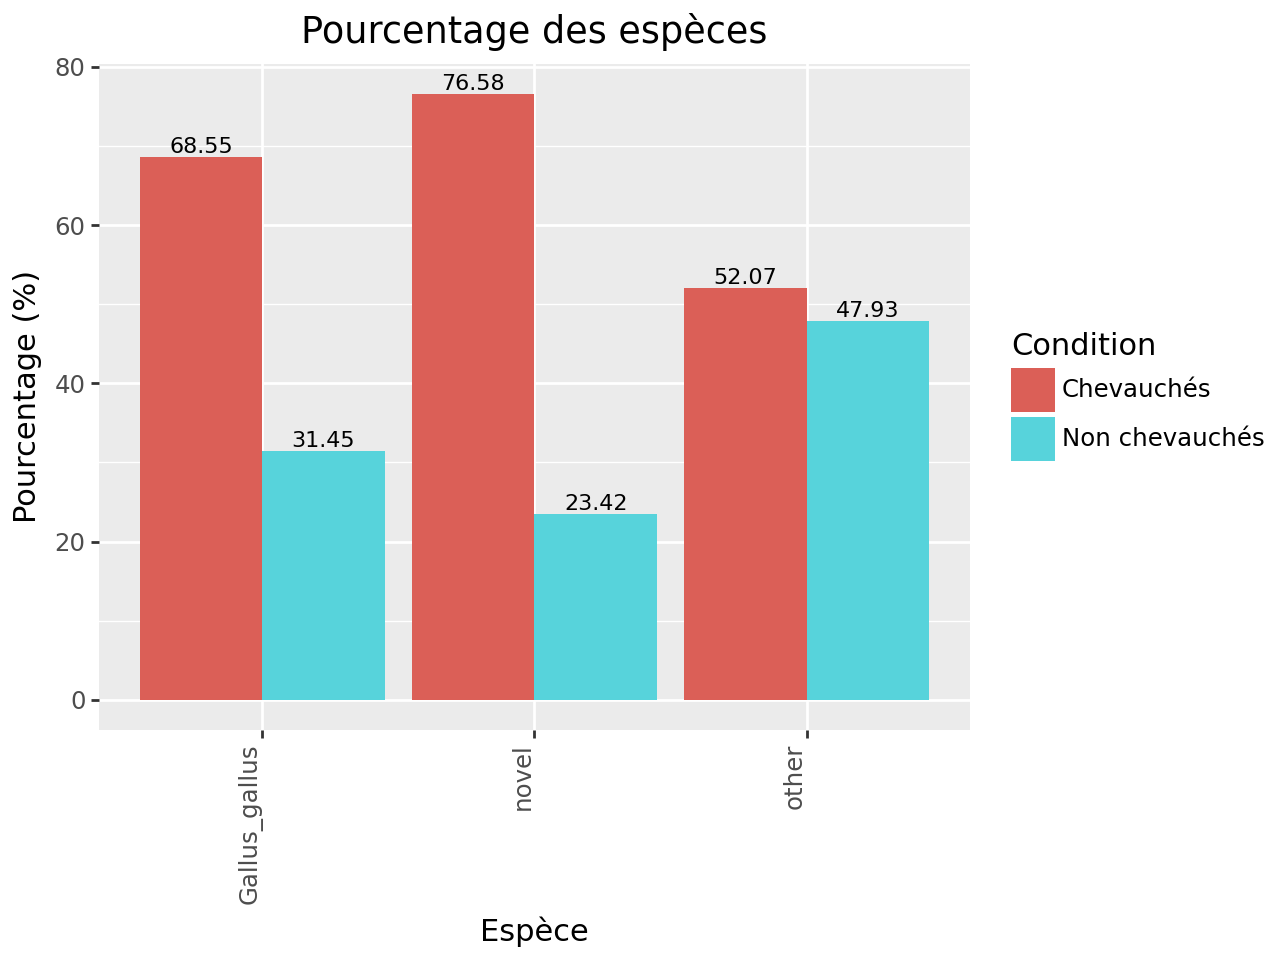

In [124]:
df_count_mirna_overlap = result_overlap.reset_index()
df_count_mirna_no_overlap = result_no_overlap.reset_index()

# Ajout d'une colonne 'Condition' pour chaque DataFrame
df_count_mirna_overlap['Condition'] = 'Chevauchés'
df_count_mirna_no_overlap['Condition'] = 'Non chevauchés'

combined_df = pd.concat([df_count_mirna_overlap,df_count_mirna_no_overlap])

combined_df.columns = ['Specie', 'Percentage', 'Condition']

# Création du graphique
dodge_width = 0.9
g = (ggplot(combined_df, aes(x='Specie', y='Percentage', fill='Condition'))
     + geom_bar(stat='identity', position=position_dodge(width=dodge_width))
     + geom_text(aes(label='round(Percentage, 2)'), position=position_dodge(width=dodge_width), size=8, va='bottom', ha='center')
     + ggtitle('Pourcentage des espèces')
     + xlab('Espèce')
     + ylab('Pourcentage (%)')
     + theme(axis_text_x=element_text(angle=90, hjust=1))  # Rotation des libellés de l'axe X
    )

# Affichage du graphique
g.show()


### Score mirdeep

In [125]:
mirdeep_score = pd.read_table("mirdeep_score.tsv", sep='\t', header=None)
mirdeep_score = mirdeep_score.rename(columns={0: 'Name', 1: 'Score'})
mirdeep_score

Name                                              Score
0        mirdeep2.7                         84,84,83,83,81,80,79,77,78
1       mirdeep2.12  75,86,76,85,82,78,84,78,72,73,81,84,83,75,81,7...
2       mirdeep2.15                               81,74,87,82,75,78,78
3       mirdeep2.16  85,75,83,87,80,81,83,84,81,80,78,69,71,77,79,8...
4       mirdeep2.21                                              83,77
...             ...                                                ...
2244  mirdeep2.6421  89,89,89,85,83,80,85,84,85,89,87,87,83,90,89,8...
2245  mirdeep2.6434                                              81,78
2246  mirdeep2.6435                                              84,80
2247  mirdeep2.6436                                              80,75
2248  mirdeep2.6437                                              82,78

[2249 rows x 2 columns]

Calculer la moyenne des scores mirdeep pour chaque miARN

In [126]:
list_mean_score = []
for row in mirdeep_score['Score'] :
    list_score = [int(x) for x in row.split(',')]
    list_mean_score.append(mean(list_score))

In [127]:
mirdeep_score['Mean'] = list_mean_score

In [128]:
mirdeep_score

Name                                              Score  \
0        mirdeep2.7                         84,84,83,83,81,80,79,77,78   
1       mirdeep2.12  75,86,76,85,82,78,84,78,72,73,81,84,83,75,81,7...   
2       mirdeep2.15                               81,74,87,82,75,78,78   
3       mirdeep2.16  85,75,83,87,80,81,83,84,81,80,78,69,71,77,79,8...   
4       mirdeep2.21                                              83,77   
...             ...                                                ...   
2244  mirdeep2.6421  89,89,89,85,83,80,85,84,85,89,87,87,83,90,89,8...   
2245  mirdeep2.6434                                              81,78   
2246  mirdeep2.6435                                              84,80   
2247  mirdeep2.6436                                              80,75   
2248  mirdeep2.6437                                              82,78   

           Mean  
0     81.000000  
1     80.250000  
2     79.285714  
3     79.882353  
4     80.000000  
...         ...  
2244  83.333333  
2245  79.500000  
2246  82.000000  
2247  77.500000  
2248  80.000000  

[2249 rows x 3 columns]

Ajouter les moyennes au dataframe correspondant au miARN chevauchés ou non 

In [129]:
filtered_df_overlap_mirna_with_score = filtered_df_overlap_mirna.merge(mirdeep_score, how='left', left_on="Name", right_on='Name')

In [130]:
filtered_df_overlap_mirna_with_score

Chromosome     Start       End Strand           Name         Specie  \
0             1    421771    421771      +    mirdeep2.12  Gallus_gallus   
1             1    572220    572220      +    mirdeep2.15  Gallus_gallus   
2             1    596831    596831      +    mirdeep2.16  Gallus_gallus   
3             1   1128302   1128302      +    mirdeep2.23          novel   
4             1   1178477   1178477      +    mirdeep2.25  Gallus_gallus   
...         ...       ...       ...    ...            ...            ...   
1646          Z  72766240  72766240      +  mirdeep2.6409          novel   
1647          Z  72766187  72766187      +  mirdeep2.6410          novel   
1648          Z  81800786  81800786      +  mirdeep2.6434          novel   
1649          Z  81830614  81830614      +  mirdeep2.6436          novel   
1650          Z  82313216  82313216      +  mirdeep2.6437          novel   

       Start_b     End_b           Name_b  Score_x Strand_b  \
0       420951    422046     Interval_130        0        +   
1       571344    573006     Interval_207        0        +   
2       596714    597066     Interval_219        0        +   
3      1127050   1130184     Interval_414        0        +   
4      1176768   1179024     Interval_437        0        +   
...        ...       ...              ...      ...      ...   
1646  72763934  72767487  Interval_372660        0        +   
1647  72763934  72767487  Interval_372660        0        +   
1648  81799523  81803349  Interval_374216        0        +   
1649  81829805  81833146  Interval_374224        0        +   
1650  82311787  82313439  Interval_374369        0        +   

                                                Score_y       Mean  
0     75,86,76,85,82,78,84,78,72,73,81,84,83,75,81,7...  80.250000  
1                                  81,74,87,82,75,78,78  79.285714  
2     85,75,83,87,80,81,83,84,81,80,78,69,71,77,79,8...  79.882353  
3                                                 70,83  76.500000  
4     91,89,89,89,83,84,78,87,89,87,89,83,84,75,75,8...  80.976190  
...                                                 ...        ...  
1646                                              75,83  79.000000  
1647                                           88,75,83  82.000000  
1648                                              81,78  79.500000  
1649                                              80,75  77.500000  
1650                                              82,78  80.000000  

[1651 rows x 13 columns]

In [131]:
filtered_df_no_overlap_mirna_with_score = filtered_df_no_overlap_mirna.merge(mirdeep_score, how='left', left_on="Name", right_on='Name')

In [132]:
filtered_df_no_overlap_mirna_with_score

Chromosome     Start       End Strand           Name         Specie  \
0            1    219508    219508      +     mirdeep2.7          novel   
1            1   1077798   1077798      +    mirdeep2.21          novel   
2            1   1478777   1478777      +    mirdeep2.36          other   
3            1   1479800   1479800      +    mirdeep2.37          other   
4            1   1479916   1479916      +    mirdeep2.38          other   
..         ...       ...       ...    ...            ...            ...   
593          Z  60673643  60673643      +  mirdeep2.6361          other   
594          Z  66646492  66646492      +  mirdeep2.6380  Gallus_gallus   
595          Z  78732076  78732076      +  mirdeep2.6420          other   
596          Z  78737707  78737707      +  mirdeep2.6421          novel   
597          Z  81826520  81826520      +  mirdeep2.6435          novel   

     Start_b  End_b Name_b  Score_x Strand_b  \
0         -1     -1     -1       -1        +   
1         -1     -1     -1       -1        +   
2         -1     -1     -1       -1        +   
3         -1     -1     -1       -1        +   
4         -1     -1     -1       -1        +   
..       ...    ...    ...      ...      ...   
593       -1     -1     -1       -1        +   
594       -1     -1     -1       -1        +   
595       -1     -1     -1       -1        +   
596       -1     -1     -1       -1        +   
597       -1     -1     -1       -1        +   

                                               Score_y       Mean  
0                           84,84,83,83,81,80,79,77,78  81.000000  
1                                                83,77  80.000000  
2    85,81,76,81,82,85,83,80,75,77,79,79,83,82,73,7...  80.675325  
3    75,80,78,91,89,89,85,85,81,89,83,80,84,76,81,8...  80.802632  
4    85,86,82,83,81,81,80,87,89,89,83,81,80,75,83,8...  80.544304  
..                                                 ...        ...  
593  89,91,89,89,89,85,83,80,85,84,78,72,82,84,81,8...  80.077922  
594  89,89,84,82,87,89,81,75,81,86,82,68,77,69,75,6...  80.387755  
595  76,81,73,74,89,91,89,89,82,86,82,83,80,85,84,7...  80.546667  
596  89,89,89,85,83,80,85,84,85,89,87,87,83,90,89,8...  83.333333  
597                                              84,80  82.000000  

[598 rows x 13 columns]

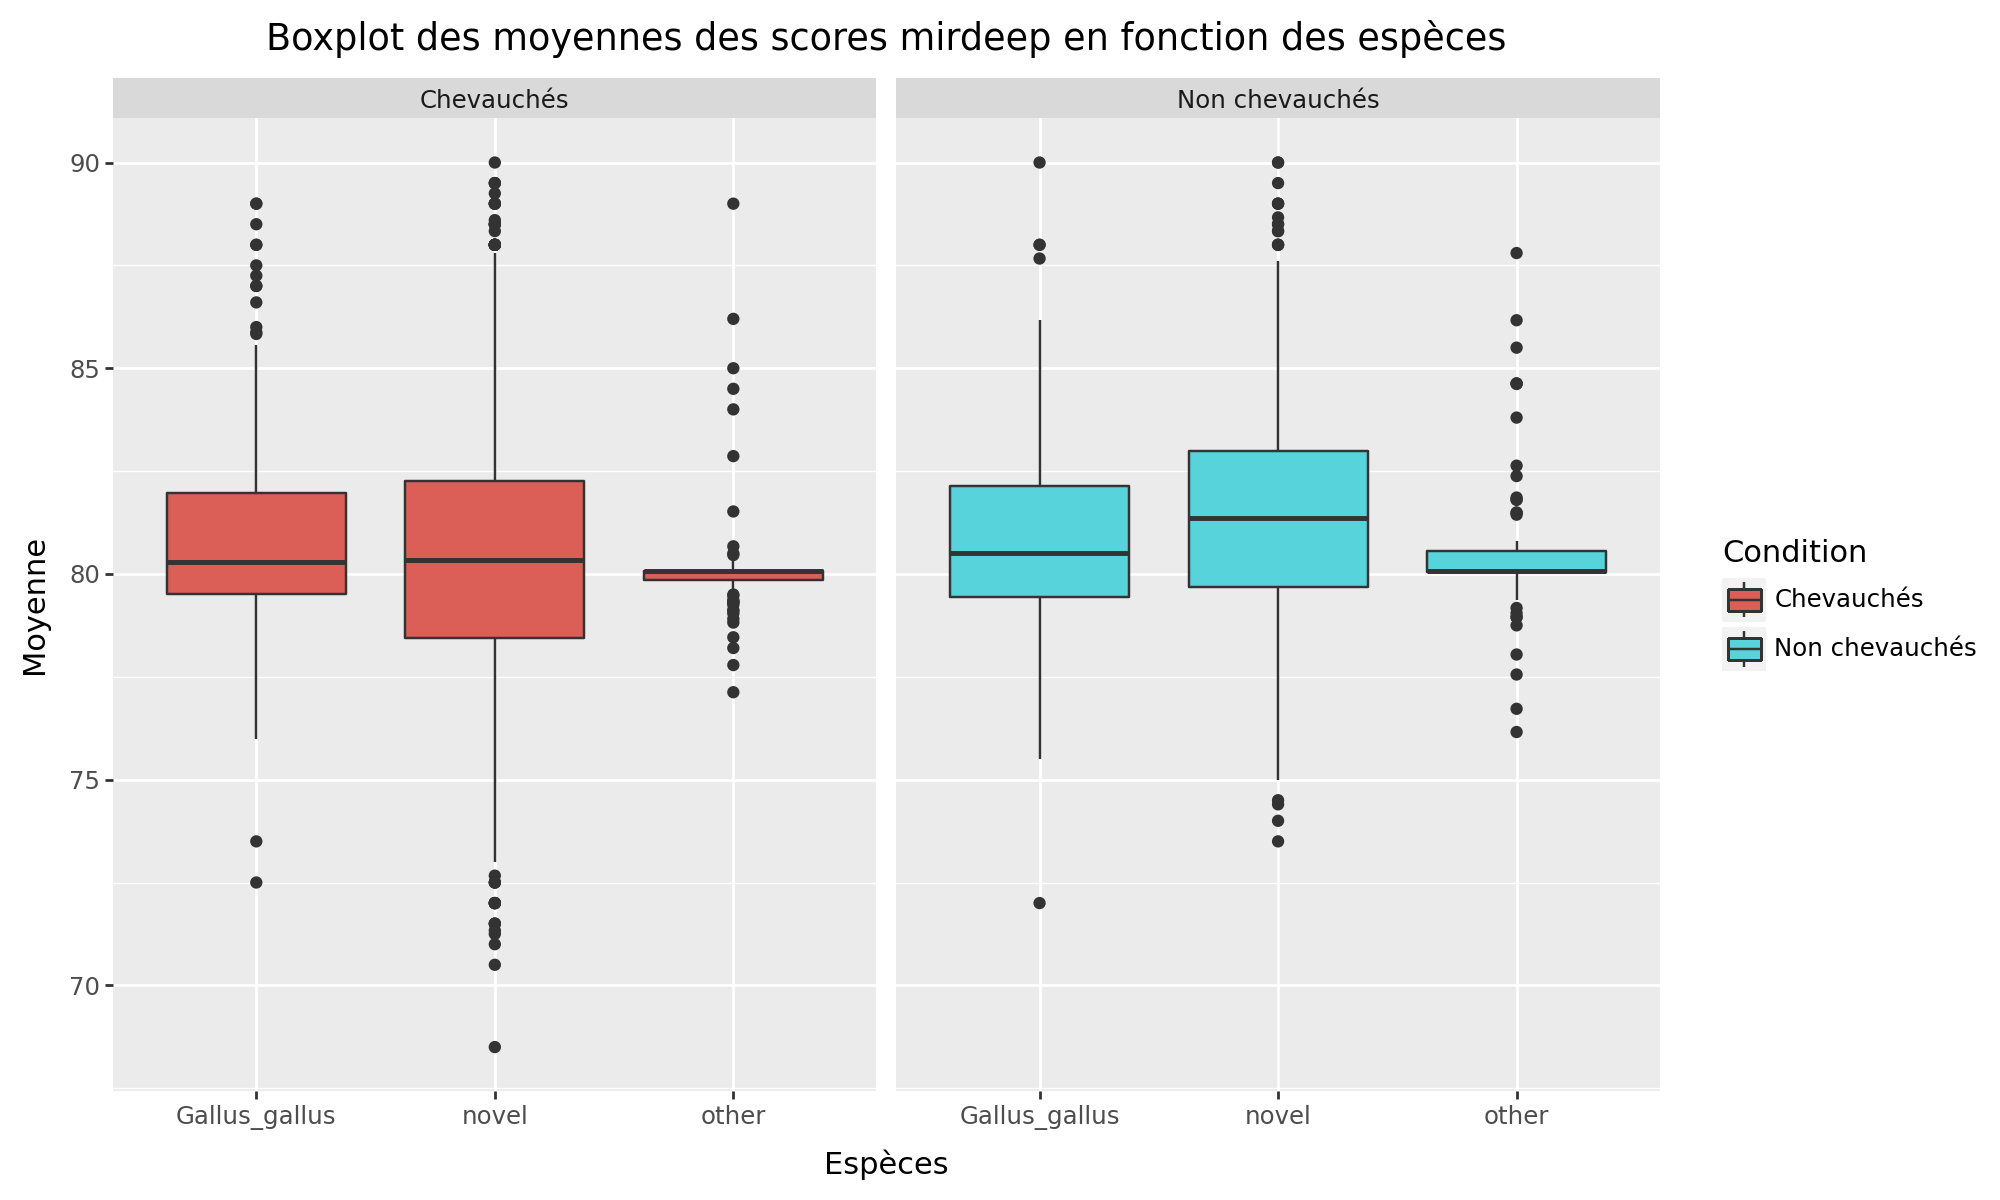

In [140]:
# Ajout d'une colonne de condition à chaque DataFrame
filtered_df_overlap_mirna_with_score['Condition'] = 'Chevauchés'
filtered_df_no_overlap_mirna_with_score['Condition'] = 'Non chevauchés'

# Concaténation des deux DataFrames
combined_df = pd.concat([filtered_df_overlap_mirna_with_score, filtered_df_no_overlap_mirna_with_score])

# Création du graphique
g = (ggplot(combined_df, aes(x='Specie', y='Mean', fill='Condition'))
    + geom_boxplot()
    + labs(title='Boxplot des moyennes des scores mirdeep en fonction des espèces',
           x='Espèces',
           y='Moyenne')
    + facet_wrap('~ Condition')
    + theme(plot_title=element_text(hjust=0.5),  # Centrer le titre
            figure_size=(10, 6))  # Définir la taille de la figure
)
# Affichage du graphique
g.show()